In [10]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Q1

In [28]:
url= 'https://raw.githubusercontent.com/nlihin/data-analytics/main/datasets/youtube/youtube_US_short.csv'
df= pd.read_csv(url)
df_max= df.views.idxmax()
df.iloc[[df_max]][['title','publish_time','views']]
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
12840,0eUk_VN3e2A,18.19.01,ASMR Lushful Spa Treatment ✨ Facial and Massage,ASMR Darling,24,2018-01-17T03:24:25.000Z,"taylor darling|""asmr darling""|""tingles""|""spa""|...",785084,23712,1591,6812,https://i.ytimg.com/vi/0eUk_VN3e2A/default.jpg,False,False,False,Hello beautiful people! Sit back and enjoy the...
12841,V0HCZ4YGqbw,18.19.01,La de da de da de da de day oh,bill wurtz,22,2018-01-16T20:34:48.000Z,"bill wurtz|""song""|""music""|""la de da de da de d...",2297342,237488,5337,27517,https://i.ytimg.com/vi/V0HCZ4YGqbw/default.jpg,False,False,False,http://billwurtz.com\n\n\n\npatreon: http://p...
12842,n08glcqdMRY,18.19.01,How to be a Pisces,Sailor J,23,2018-01-17T23:28:57.000Z,"How To|""Makeup""|""Zodiac""|""Blue""|""Eyeshadow""|""T...",112969,9459,288,1866,https://i.ytimg.com/vi/n08glcqdMRY/default.jpg,False,False,False,Which sign should I do next??\n\nCome find me ...
12843,HbNYuOTaYFs,18.19.01,I Bought The $80 Starbucks Mug...,Dave Lee,28,2018-01-17T22:33:30.000Z,"Dave2D|""Review""|""dave lee""|""mug""|""cup""|""coffee...",275653,11167,637,1269,https://i.ytimg.com/vi/HbNYuOTaYFs/default.jpg,False,False,False,Dave2D review of the Ember ceramic mug sold at...
12844,GZMrivD2Aok,18.19.01,Queer Eye | Official Trailer [HD] | Netflix,Netflix,24,2018-01-17T15:00:02.000Z,"Netflix|""Trailer""|""Netflix Original Series""|""N...",238333,3282,1629,875,https://i.ytimg.com/vi/GZMrivD2Aok/default.jpg,False,False,False,"With a new Fab 5 and some very tough missions,..."


# Q2 
הציגו את שלושת הערוצים עם מספר הצפיות הגבוה ביותר. עליכם להציג אך ורק את
הנתונים הללו: channel _title, views )שלוש שורות שלהם( .

In [13]:
df_group=df.groupby('channel_title')[['views']].max()
df_group.sort_values('views',ascending=False).head(3)

,views
channel_title,
YouTube Spotlight,149376127
LuisFonsiVEVO,102012605
Marvel Entertainment,91933007


# Q3 
20% ( מהי הקורלציה ע"פ spearman בין מספר ה likes, dislikes, views, comment_count


In [15]:
features = ['likes', 'dislikes','views','comment_count']
correlation_matrix = df[features].corr(method='spearman').round(2)
correlation_matrix

,likes,dislikes,views,comment_count
likes,1.00,0.80,0.88,0.88
dislikes,0.80,1.00,0.87,0.84
views,0.88,0.87,1.00,0.84
comment_count,0.88,0.84,0.84,1.00


# Q4 
צרו heatmap עבור סעיף 3 .

<AxesSubplot:>

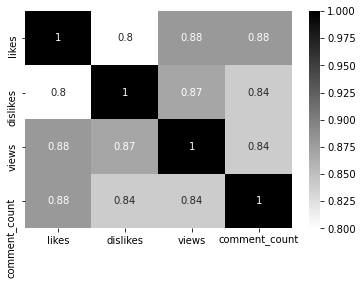

In [20]:
sns.heatmap(data=correlation_matrix,cmap='binary', annot=True)

# Q5 
20% ( צרו scatterplot להראות את שתי הקורלציות הכי חזקות שמצאתם בסעיף 3 )במידה ויש
תיקו, ביחרו שתיים מתוך ההכי חזקות(

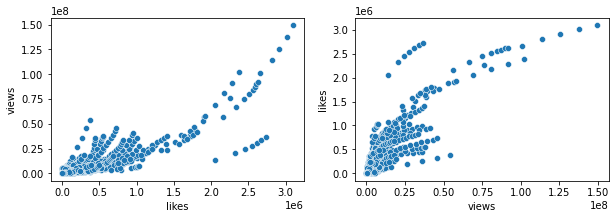

In [27]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2,figsize = (10,3))
matrix_corr_test=correlation_matrix.unstack().sort_values()[-8:-4]
taplist = pd.Series.keys(matrix_corr_test)
plt1 = sns.scatterplot(ax = axes[0],data=df, x=taplist[0][0], y=taplist[0][1])
plt2 = sns.scatterplot(ax = axes[1],data=df, x=taplist[2][0], y=taplist[2][1])


# Q6

In [59]:
df['year'] = pd.DatetimeIndex(df.publish_time).year
# df['year']
# data_year = df.loc[(df.year >=2017)]
# data_year[['views','category_id','year']]

In [57]:
# df['year'] = pd.DatetimeIndex(df.publish_time).year
# mish=df.pivot_table('views', index='year', columns='category_id', aggfunc='sum')
# mish.loc[2107:2019]

In [61]:
table1= df.pivot_table('views', index='year', columns='category_id', aggfunc='sum').copy() 
table1.loc[2017:2019]

category_id,1,2,10,15,17,19,20,22,23,24,25,26,27,28,29,43
year,,,,,,,,,,,,,,,,
2017,865461513.0,78853521.0,4.504741e+09,144245930.0,381243186.0,54291438.0,50354420.0,701825770.0,1.130782e+09,4.049600e+09,235729643.0,798971191.0,202535856.0,500594905.0,154195.0,1751446.0
2018,144072937.0,8047346.0,8.398109e+08,32629265.0,61660329.0,7583452.0,84176667.0,67849434.0,1.971474e+08,6.453337e+08,48419659.0,89889352.0,48936175.0,85462155.0,229172.0,NaN


In [58]:
# df['year'] = pd.DatetimeIndex(df.publish_time).year
# new = df.pivot_table('views', index='category_id', columns='year',aggfunc='sum').copy()
# new.groupby("category_id")[[2017,2018]].sum()

year,2017,2018
category_id,,
1,8.654615e+08,144072937.0
2,7.885352e+07,8047346.0
10,4.504741e+09,839810930.0
15,1.442459e+08,32629265.0
17,3.812432e+08,61660329.0
19,5.429144e+07,7583452.0
20,5.035442e+07,84176667.0
22,7.018258e+08,67849434.0
23,1.130782e+09,197147385.0
